<a href="https://colab.research.google.com/github/sara010896/PPCA_UnB/blob/main/Regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan


In [ ]:
df = pd.read_csv("AmesHousing.csv")


In [ ]:
#Dimensões do DataFrame
print("Dimensões:", df.shape)

Dimensões: (2930, 82)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [ ]:
# Primeiras linhas do DataFrame
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
#Verificando valores faltantes
missing = df.isna().sum()
print("\nValores faltantes por coluna:")
print(missing[missing > 0])


Valores faltantes por coluna:
Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


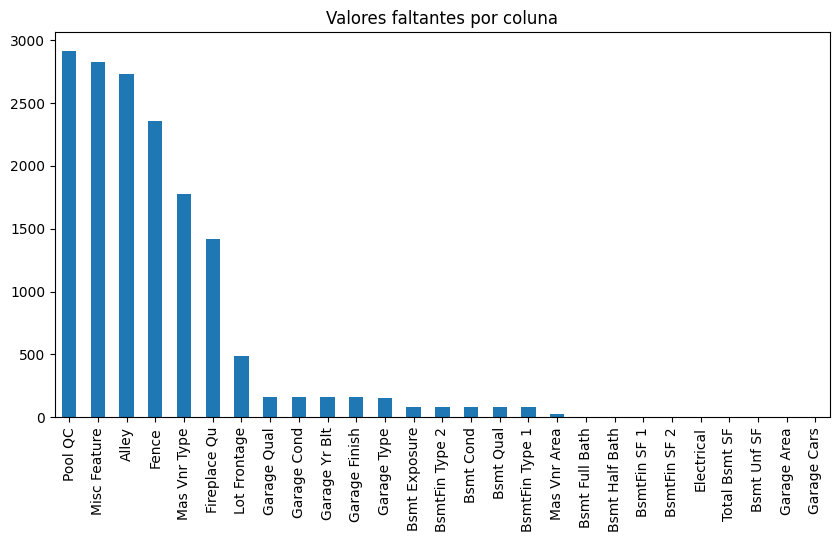

In [ ]:
plt.figure(figsize=(10,5))
missing[missing > 0].sort_values(ascending=False).plot.bar()
plt.title("Valores faltantes por coluna")
plt.show()

In [ ]:
# Tratamento de dados ausentes
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns

# variáveis numéricas (mediana)
for col in num_cols:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# variáveis categóricas
for col in cat_cols:
    if df[col].isna().sum() > 0:
        # se o NaN representa ausência, usar "None"
        if col in ["Alley", "PoolQC", "Fence", "FireplaceQu", "MiscFeature", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "MasVnrType"]:
            df[col].fillna("None", inplace=True)
        else:
            # senão, preencher com a moda
            df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-204120209.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-204120209.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
#Validação do tratamento de dados ausentes
missing = df.isna().sum()
print("\nValores faltantes por coluna:")
print(missing[missing > 0])


Valores faltantes por coluna:
Series([], dtype: int64)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

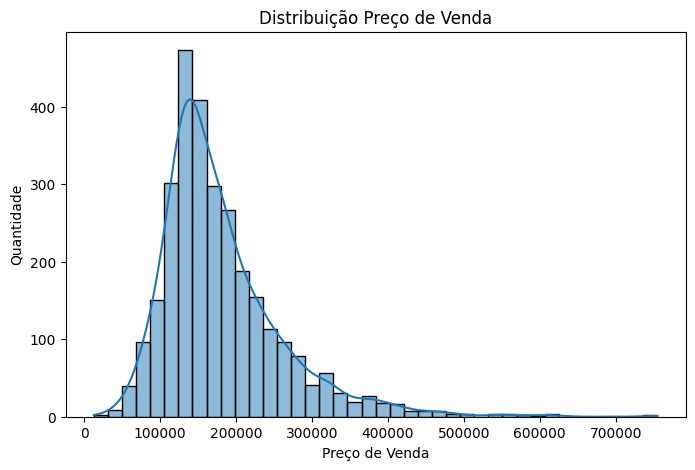

In [ ]:
# Distribuição Preço de Venda
plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice"], bins=40, kde=True)
plt.title("Distribuição Preço de Venda")
plt.xlabel("Preço de Venda")
plt.ylabel("Quantidade")
plt.show()

In [ ]:
print("Preço médio:", df["SalePrice"].mean())
print("Preço mediano:", df["SalePrice"].median())

Preço médio: 180796.0600682594
Preço mediano: 160000.0


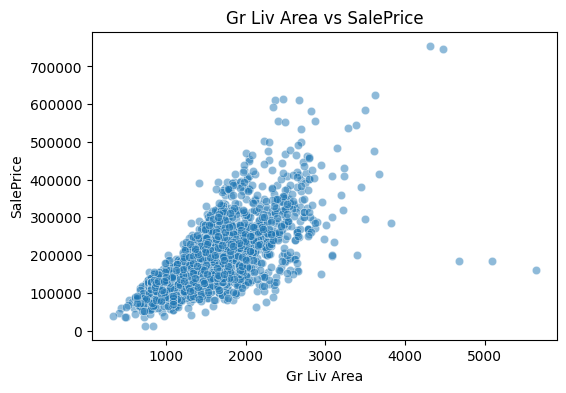

In [ ]:
features_num = ["Gr Liv Area","Garage Cars", "Overall Qual", "TotRms AbvGrd"]
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Gr Liv Area"], y=df["SalePrice"], alpha=0.5)
plt.title("Gr Liv Area vs SalePrice")
plt.show()

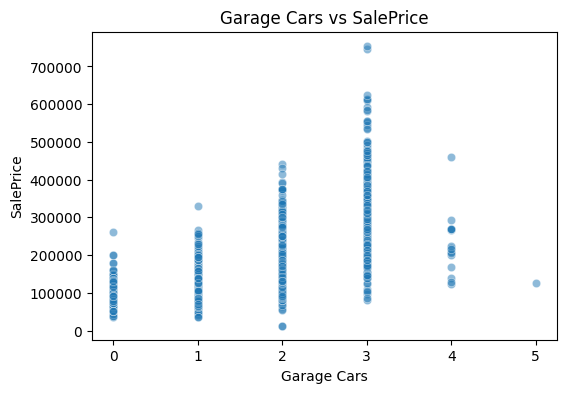

In [ ]:
  plt.figure(figsize=(6,4))
  sns.scatterplot(x=df["Garage Cars"], y=df["SalePrice"], alpha=0.5)
  plt.title("Garage Cars vs SalePrice")
  plt.show()

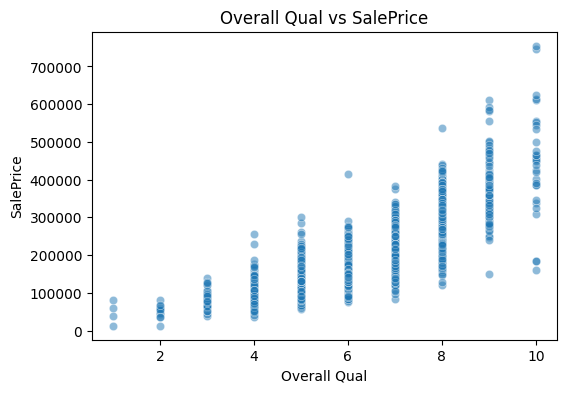

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Overall Qual"], y=df["SalePrice"], alpha=0.5)
plt.title(f"{"Overall Qual"} vs SalePrice")
plt.show()

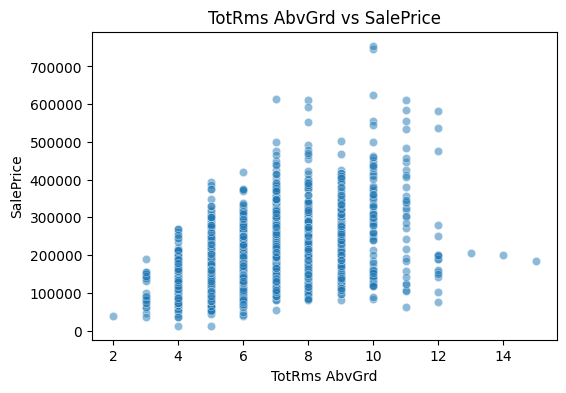

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["TotRms AbvGrd"], y=df["SalePrice"], alpha=0.5)
plt.title("TotRms AbvGrd vs SalePrice")
plt.show()

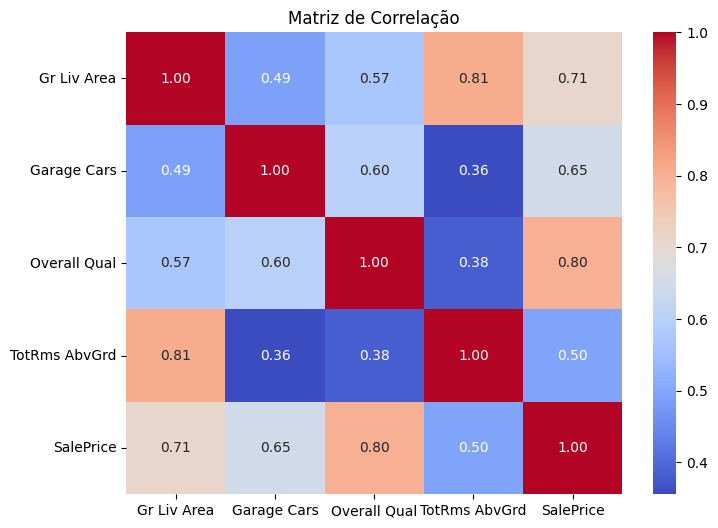

In [ ]:
plt.figure(figsize=(8,6))
corr = df[features_num + ["SalePrice"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

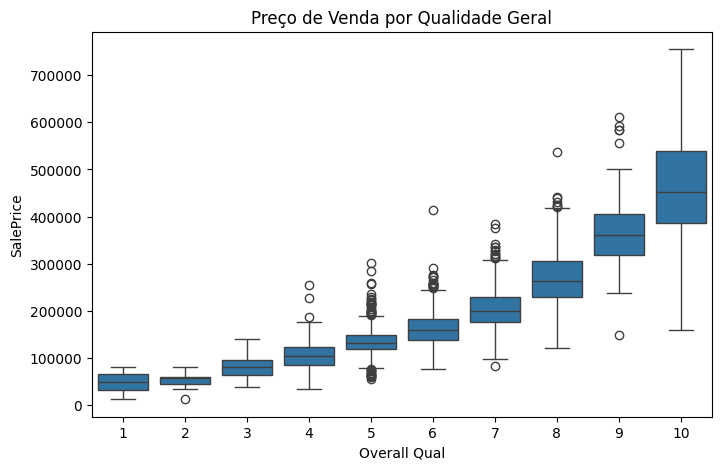

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Overall Qual", y="SalePrice", data=df)
plt.title("Preço de Venda por Qualidade Geral")
plt.show()

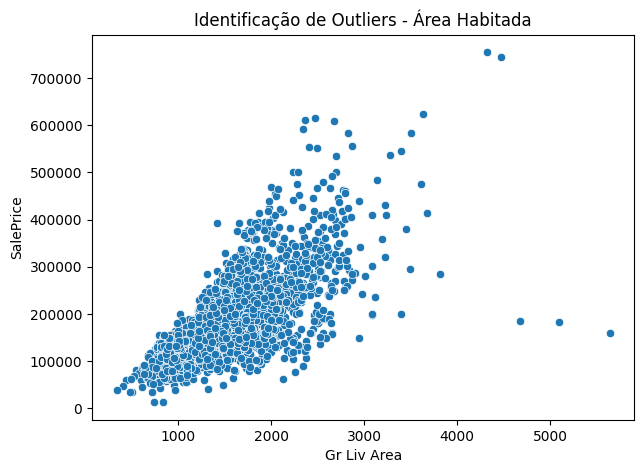

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df["Gr Liv Area"], y=df["SalePrice"])
plt.title("Identificação de Outliers - Área Habitada")
plt.show()

In [ ]:
X = df[["Overall Qual", "Gr Liv Area", "Garage Cars", "TotRms AbvGrd"]]
y = df["SalePrice"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

In [ ]:
print("Treino")
print(f"R²: {r2_score(y_train, y_pred_train):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")

Treino
R²: 0.750
RMSE: 38968.11
MAE: 27306.45


In [ ]:
print("\nTeste")
print(f"R²: {r2_score(y_test, y_pred_test):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")


Teste
R²: 0.764
RMSE: 40768.10
MAE: 27074.81


In [ ]:
coeficientes = pd.DataFrame({"Variável": X.columns, "Coeficiente": modelo.coef_})
print("\nCoeficientes")
print(coeficientes)


Coeficientes
        Variável   Coeficiente
0   Overall Qual  26906.833531
1    Gr Liv Area     63.902505
2    Garage Cars  20230.231123
3  TotRms AbvGrd  -5099.675031


In [ ]:
X_int = X.copy()
X_int["Qual_Rooms_Interaction"] = X_int["Overall Qual"] * X_int["TotRms AbvGrd"]

X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size=0.3, random_state=42)

modelo_interacao = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print("\nModelo com Interação")
print(modelo_interacao.summary())


Modelo com Interação
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     1345.
Date:                Fri, 03 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:06:11   Log-Likelihood:                -24521.
No. Observations:                2051   AIC:                         4.905e+04
Df Residuals:                    2045   BIC:                         4.909e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const 

In [ ]:
p_val = modelo_interacao.pvalues["Qual_Rooms_Interaction"]
coef = modelo_interacao.params["Qual_Rooms_Interaction"]

In [ ]:
if p_val < 0.05:
    print(f"\nA interação é significativa (p={p_val:.3f}).")
    print(f"O coeficiente da interação é {coef:.2f}, indicando que o efeito do número de quartos depende da qualidade geral.")
else:
    print(f"\nA interação não é significativa (p={p_val:.3f}).")



A interação é significativa (p=0.000).
O coeficiente da interação é 3783.52, indicando que o efeito do número de quartos depende da qualidade geral.


In [ ]:
X_const = sm.add_constant(X_train)
modelo_sm = sm.OLS(y_train, X_const).fit()
print("\nResumo do modelo (statsmodels):")
print(modelo_sm.summary())


Resumo do modelo (statsmodels):
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     1345.
Date:                Fri, 03 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:06:11   Log-Likelihood:                -24521.
No. Observations:                2051   AIC:                         4.905e+04
Df Residuals:                    2045   BIC:                         4.909e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [ ]:
residuos = modelo_sm.resid
fitted = modelo_sm.fittedvalues

In [ ]:
stat, p_shapiro = shapiro(residuos)
print(f"\nTeste Shapiro-Wilk: stat={stat:.3f}, p={p_shapiro:.3f}")
if p_shapiro > 0.05:
    print("Resíduos seguem normalidade")
else:
    print("Resíduos não normais")


Teste Shapiro-Wilk: stat=0.871, p=0.000
Resíduos não normais


In [ ]:
bp_test = het_breuschpagan(residuos, modelo_sm.model.exog)
labels = ['LM Stat', 'LM p-val', 'F Stat', 'F p-val']
print("\nTeste Breusch-Pagan:")
print(dict(zip(labels, bp_test)))


Teste Breusch-Pagan:
{'LM Stat': np.float64(514.5539439950263), 'LM p-val': np.float64(5.76136657224635e-109), 'F Stat': np.float64(136.97361015145492), 'F p-val': np.float64(1.6665583108945108e-125)}


In [ ]:
vif = pd.DataFrame()
vif["Variável"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i)
              for i in range(X_const.shape[1])]
print("\nVIF - Fator de Inflação da Variância:")
print(vif)



VIF - Fator de Inflação da Variância:
                 Variável         VIF
0                   const  253.423819
1            Overall Qual   13.320177
2             Gr Liv Area    3.960339
3             Garage Cars    1.596367
4           TotRms AbvGrd   15.557908
5  Qual_Rooms_Interaction   37.062149


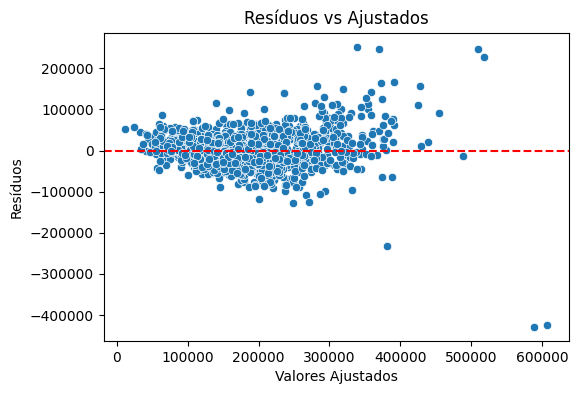

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted, y=residuos)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Ajustados")
plt.show()

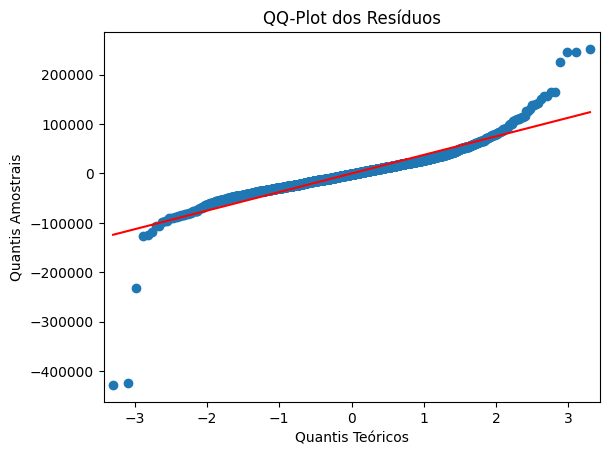

In [ ]:
sm.qqplot(residuos, line='s')
plt.title("QQ-Plot dos Resíduos")
plt.xlabel("Quantis Teóricos")
plt.ylabel("Quantis Amostrais")
plt.show()

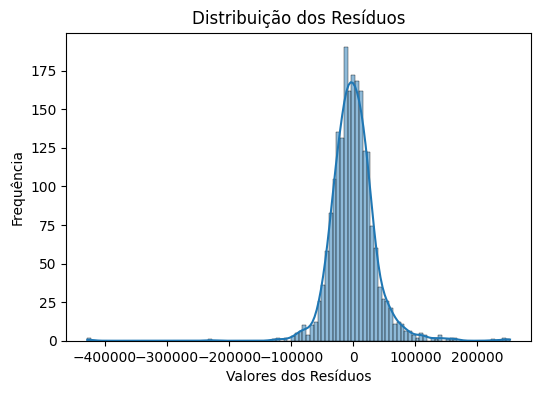

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(residuos, kde=True)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Valores dos Resíduos")
plt.ylabel("Frequência")
plt.show()